# FIT 5149 Assessment 2

#### Student Name: Mark Joseph Jose
#### Student Number: 28066049

Date:  19 September 2017 
 
Version: 1

Environment: R 3.3.2 and Jupyter notebook

<p style = "text-align:center"> <h1> Predicting Wine Quality Using Logistic Regression</h1></p>

## Introduction
This assessment covers weeks 4 to 6, mainly about **Classification Models**, **Resampling Methods**, and **Linear Model Selection and Classification**. This includes parsing CSV files, performing exploratory data analysis, creating a logistic regression model, and improving that model via feature selection or regularization and cross-validation.

**Exploratory Data Analysis** has been discussed and assessed in the previous assessment. However, it always pays to do it for every data analysis task, since the first step to modelling is always getting to know your data.

**Logistic Regression** is a discriminative probabilistic model that directly computes the probability of a data belonging to a certain class by using the logistic function whose output is always between 0 to 1.

**K-fold Cross Validation** is a common way to test a model's performance by dividing the data set into k folds, where the kth fold is used for testing and the remaining k-1 folds are used for training, repeated k times until every fold has been used for testing and training. 

**Feature Selection** is a way of improving the model by removing irrelevant features to the model either by *forward stepwise selection*, *backward stepwise selection*, or a stepwise selection involving both forward and backward. In this assessment, only forward stepwise selection is used. The details of forward stepwise selection will be discussed the next sections.

**Regularization** is another way to improve the model. It is mainly used to reduce overfitting by adding a penalty term. The type of regularization depends on the penalty term added. This assessment will use two types of regularization, *lasso* and *ridge* regularization. 

The **data used** is a CSV file that describes wine quality (good versus bad) based on several factors. The data will be further described in the following exploratory data analysis. Logistic regression will be used to predict wine quality from the set of features.

## Contents
1. Importing the Data
2. Exploratory Data Analysis
    <br/>2.1 Enumerating variables and determining variable type
    <br/>2.2 Finding statistics per variable (to determine the distribution of values)
    <br/>2.3 Performing pictorial representations per variable
    <br/>2.4 Determining outliers and other possible issues
    <br/>2.5 Determining any association between variables
3. Logistic Regression
4. Stepwise Logistic Regression / Feature Selection
    <br/>4.1 Forward Stepwise Selection based on Model AUC
    <br/>4.2 Forward Stepwise Selection based on Model Accuracy
    <br/>4.3 Forward Stepwise Selection based on Model AIC
    <br/>4.4 Analysis of Stepwise Logistic Regression Models
5. Regularized Logistic Regression
    <br/>5.1 Logistic Regression with Ridge (L2) Regularization
    <br/>5.2 Logistic Regression with LASSO (L1) Regularization
6. Comparison Between Feature Selection and Regularization
7. Conclusion

In [1]:
# information about the R kernel and machine used
sessionInfo()

R version 3.3.2 (2016-10-31)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 15063)

locale:
[1] LC_COLLATE=English_Australia.1252  LC_CTYPE=English_Australia.1252   
[3] LC_MONETARY=English_Australia.1252 LC_NUMERIC=C                      
[5] LC_TIME=English_Australia.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] R6_2.2.2            magrittr_1.5        IRdisplay_0.4.4    
 [4] pbdZMQ_0.2-6        tools_3.3.2         crayon_1.3.2       
 [7] uuid_0.1-2          stringi_1.1.5       IRkernel_0.8.7.9000
[10] jsonlite_1.5        stringr_1.2.0       digest_0.6.12      
[13] repr_0.12.0         evaluate_0.10.1    

In [1]:
# import libraries
library(lattice)
library(glmnet) # for building the logistic regression model
library(caret) # for the confusion matrix
library(pROC) # for getting the auc score
library(gridExtra) # for arranging plots
library(grid)
library(reshape2) # for using melt()
library(moments) # for computing skewness and kurtosis
library(car) # for scatterplotMatrix()

Warning message:
"package 'reshape2' was built under R version 3.3.3"Warning message:
"package 'glmnet' was built under R version 3.3.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.3.3"Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.3.3"Loaded glmnet 2.0-10

Warning message:
"package 'caret' was built under R version 3.3.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.3.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'pROC' was built under R version 3.3.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following object is masked from 'package:glmnet':

    auc

The following objects are masked from 'package:stats':

    cov, smooth, var

Warning message:
"package 'gridExtra' was built under R version 3.3.3"Warning message:
"package

## 1. Importing the data

This part comprises the following tasks:
1. Reading that 'training.csv' CSV file into R
2. Converting the 'training.csv' CSV file into a dataframe
3. Initial Exploration of the data

### 1.1 Data Description

The data includes several records of wine properties and their resulting quality. It includes the following information:


1. **fixed acidity** - the level of fixed acidity in the wine, which contributes to the wine's sourness or tartness
2. **volatile acidity**	- the level of acetic acid (wine spoilage) in the wine
3. **citric acid**	- acid commonly found in citrus fruits that adds flavors to the wine
4. **residual sugar**	- the sweet taste coming from the wine
5. **chlorides**	- the salt contained in the wine
6. **free sulfur dioxide**	- prevents microbial growth and oxidation in the wine
7. **total sulfur dioxide**	- total sulfur dioxide found in the wine
8. **density**	- the density of the wine
9. **pH** - describes the level of acidity in the wine
10. **sulphates** - chemical used as preservative
11. **alcohol**	- the alcohol content of the wine
12. **quality** - the overall rating of the wine's quality (good or bad)

### 1.2 Data Import
To import the data, I used R's `read.csv()` function. This function allows CSV (comma-separated values) files to be imported into R where it is automatically converted into a dataframe.

In [3]:
training.file <- read.csv('Wine_training_dataset_2017.csv')
testing.file <- read.csv('Wine_testing_dataset_2017.csv')

In [4]:
head(training.file)
head(testing.file)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,good
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,good
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,good
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,good
6.2,0.32,0.16,7.00,0.045,30,136,0.9949,3.18,0.47,9.6,good
8.1,0.27,0.41,1.45,0.033,11,63,0.9908,2.99,0.56,12.0,bad


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
4.9,0.235,0.27,11.75,0.030,34,118,0.99540,3.07,0.50,9.400000,good
6.0,0.410,0.23,1.10,0.066,22,148,0.99266,3.30,0.47,9.633333,bad
6.4,0.350,0.51,7.80,0.055,53,177,0.99502,3.12,0.45,9.600000,bad
5.2,0.405,0.15,1.45,0.038,10,44,0.99125,3.52,0.40,11.600000,bad
5.8,0.290,0.27,1.60,0.062,17,140,0.99138,3.23,0.35,11.100000,good
7.3,0.350,0.67,8.30,0.053,10,100,0.99590,3.19,0.50,10.900000,bad


### 1.3 Data scaling

Data normalization or standardization is a way to level the values of the features into the same range. The method used to scale the data is Z-Score Normalization. **Z-Score Normalization** is used to transform all means of the variables to 0 and all standard deviation to 1. This helps remove distortions that stem from the variables having different means and standard deviations without having to remove the outliers. 

Given a dataset x, the standard equation for Z-Score Normalization is:

**<center>z<sub>i</sub> = (x<sub>i</sub> - mean(x))/(std(x))</center>**

Values above the mean will have positive values, while values below the mean will have negative values. The overall shape of a distribution will not change after normalization. 

In [5]:
# scale the dataset
col.scale <- function(x){return(scale(x))}
training.data <- as.data.frame(apply(training.file[-12], 2, col.scale))
training.data['quality'] <- training.file['quality']
testing.data <- as.data.frame(apply(testing.file[-12], 2, col.scale))
testing.data['quality'] <- testing.file['quality']

In [6]:
head(training.data)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0.1704940,-0.099570087,0.19699543,2.9769112,-0.04475398,0.5793011,0.75533126,2.4300646,-1.28556670,-0.355549369,-1.4577697,good
-0.6375330,0.190096370,0.03488589,-0.8991602,0.12769591,-1.2259628,-0.13220067,0.0517580,0.69447059,-0.003352468,-0.8835977,good
0.4013589,-0.485792030,-0.12722364,0.5010960,0.51570816,0.6957697,1.12902891,0.5953709,-0.03154309,-0.795795494,-0.5554994,good
1.4402507,-0.003014602,0.52121450,0.1763989,0.17080839,-0.2942137,-0.94966428,0.4254919,0.43046561,-0.443598594,-0.3914502,good
-0.7529654,0.383207341,-1.42409994,0.1966925,-0.04475398,-0.2942137,-0.03877625,0.3575403,-0.09754433,-0.179450918,-0.8015731,good
1.4402507,-0.099570087,0.60226927,-0.9296005,-0.56210365,-1.4006657,-1.74377180,-1.0354679,-1.35156794,0.612992107,1.1670168,bad


## 2. Exploratory data analysis
Although exploratory data analysis is not assessed for this assignment, it is always wise to perform it before doing any analysis. That way we could understand the data better.

It comprises of the following tasks:

<br/>2.1 Enumerating variables and determining variable type 
<br/>2.2 Finding statistics per variable (to determine the distribution of values) 
<br/>2.3 Determining the distributions of the variable
<br/>2.4 Finding any relationships among variables


### 2.1 Enumerating variables and determining variable type

To get an initial overview of the resulting dataframe, check the following:
- dimensions of the dataframe (how many rows of records? how many columns?)
- the initial parsing of the data (what are the data types?)
- are the data in the correct format?

#### Dimensions of the Dataframe

To check for the dimension, the function `dim()` is used. This function accepts a data frame and outputs the dimensions in *rows* x *columns*.

In [7]:
cat("training set")
dim(training.data)
cat("test set")
dim(testing.data)

training set

[1] 3283   12

test set

[1] 678  12

So there are 3,283 records for training, while only 678 records for testing. Both files have 12 columns, or the 11 features plus the target variable.

In [8]:
str(training.file)

'data.frame':	3283 obs. of  12 variables:
 $ fixed.acidity       : num  7 6.3 7.2 8.1 6.2 8.1 7.9 6.6 8.3 6.6 ...
 $ volatile.acidity    : num  0.27 0.3 0.23 0.28 0.32 0.27 0.18 0.16 0.42 0.17 ...
 $ citric.acid         : num  0.36 0.34 0.32 0.4 0.16 0.41 0.37 0.4 0.62 0.38 ...
 $ residual.sugar      : num  20.7 1.6 8.5 6.9 7 ...
 $ chlorides           : num  0.045 0.049 0.058 0.05 0.045 0.033 0.04 0.044 0.04 0.032 ...
 $ free.sulfur.dioxide : num  45 14 47 30 30 11 16 48 41 28 ...
 $ total.sulfur.dioxide: num  170 132 186 97 136 63 75 143 172 112 ...
 $ density             : num  1.001 0.994 0.996 0.995 0.995 ...
 $ pH                  : num  3 3.3 3.19 3.26 3.18 2.99 3.18 3.54 2.98 3.25 ...
 $ sulphates           : num  0.45 0.49 0.4 0.44 0.47 0.56 0.63 0.52 0.67 0.55 ...
 $ alcohol             : num  8.8 9.5 9.9 10.1 9.6 12 10.8 12.4 9.7 11.4 ...
 $ quality             : Factor w/ 2 levels "bad","good": 2 2 2 2 2 1 1 2 1 2 ...


#### Evaluating Variable Types

All of the 11 features are **numerical and continuous**. The target variable, meanwhile, is categorical.

Looking at the variables, all of them have different ranges, some are large (total.sulfur.dioxide, alcohol, residual sugar) and some are small (volatile.acidity, citric.acid, chlorides). Normalization is indeed important.

### 2.2 Finding statistics per variable (to determine the distribution of values)

Again, using the `summary()` function gives out initial descriptive statistics like *minimum, maximum mean, median, quartiles, etc.* per column.

It might be better to **group them by quality**--check the statistics for good wine first, then bad wine after.

In [9]:
cat("TRAIN DATASET\n")
cat("\n good wine statistics")
summary(subset(training.file, quality == 'good'))
cat("\n--------------------------------------------------------------------\n\n bad wine statistics")
summary(subset(training.file, quality == 'bad'))

TRAIN DATASET

 good wine statistics

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.800  
 1st Qu.: 6.200   1st Qu.:0.2000   1st Qu.:0.2800   1st Qu.: 1.700  
 Median : 6.700   Median :0.2500   Median :0.3200   Median : 4.450  
 Mean   : 6.789   Mean   :0.2631   Mean   :0.3358   Mean   : 5.637  
 3rd Qu.: 7.300   3rd Qu.:0.3100   3rd Qu.:0.3800   3rd Qu.: 8.200  
 Max.   :14.200   Max.   :0.9650   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   :  3.00      Min.   : 18.0        Min.   :0.9871  
 1st Qu.:0.03400   1st Qu.: 24.00      1st Qu.:104.0        1st Qu.:0.9911  
 Median :0.04000   Median : 33.00      Median :127.0        Median :0.9928  
 Mean   :0.04273   Mean   : 34.95      Mean   :132.1        Mean   :0.9932  
 3rd Qu.:0.04700   3rd Qu.: 44.00      3rd Qu.:157.0        3rd Qu.:0.9952  
 Max.   :0.25500   Max.   :112.00      Max.   :294.0   


--------------------------------------------------------------------

 bad wine statistics

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 4.600   Min.   :0.1000   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.400   1st Qu.:0.2400   1st Qu.:0.2400   1st Qu.: 1.600  
 Median : 6.800   Median :0.2900   Median :0.3200   Median : 6.300  
 Mean   : 6.977   Mean   :0.3143   Mean   :0.3354   Mean   : 6.808  
 3rd Qu.: 7.500   3rd Qu.:0.3500   3rd Qu.:0.4200   3rd Qu.:10.700  
 Max.   :11.800   Max.   :1.1000   Max.   :1.0000   Max.   :23.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  2.00      Min.   :  9.0        Min.   :0.9872  
 1st Qu.:0.04000   1st Qu.: 20.00      1st Qu.:115.0        1st Qu.:0.9932  
 Median :0.04700   Median : 33.00      Median :149.0        Median :0.9949  
 Mean   :0.05256   Mean   : 35.26      Mean   :148.5        Mean   :0.9951  
 3rd Qu.:0.05400   3rd Qu.: 49.00      3rd Qu.:182.0        3rd Qu.:0.9968  
 Max.   :0.34600   Max.   :289.00      Max.   :440.0   

In [10]:
cat("TEST DATASET\n")
cat("\n good wine statistics")
summary(subset(testing.file, quality == 'good'))
cat("\n--------------------------------------------------------------------\n\n bad wine statistics")
summary(subset(testing.file, quality == 'bad'))

TEST DATASET

 good wine statistics

 fixed.acidity   volatile.acidity  citric.acid     residual.sugar  
 Min.   :4.200   Min.   :0.1000   Min.   :0.0000   Min.   : 0.700  
 1st Qu.:6.200   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.500  
 Median :6.600   Median :0.2600   Median :0.3200   Median : 3.400  
 Mean   :6.728   Mean   :0.2684   Mean   :0.3325   Mean   : 5.011  
 3rd Qu.:7.200   3rd Qu.:0.3200   3rd Qu.:0.3800   3rd Qu.: 7.950  
 Max.   :9.700   Max.   :0.7100   Max.   :1.0000   Max.   :19.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01500   Min.   :  3.00      Min.   : 46.0        Min.   :0.9871  
 1st Qu.:0.03400   1st Qu.: 23.00      1st Qu.:101.0        1st Qu.:0.9909  
 Median :0.04000   Median : 33.00      Median :127.0        Median :0.9926  
 Mean   :0.04264   Mean   : 34.89      Mean   :130.6        Mean   :0.9929  
 3rd Qu.:0.04700   3rd Qu.: 43.50      3rd Qu.:154.0        3rd Qu.:0.9945  
 Max.   :0.19700   Max.   :108.00      Max.   :272.0        Ma


--------------------------------------------------------------------

 bad wine statistics

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 4.200   Min.   :0.1100   Min.   :0.0000   Min.   : 0.700  
 1st Qu.: 6.250   1st Qu.:0.2375   1st Qu.:0.2400   1st Qu.: 1.500  
 Median : 6.800   Median :0.2800   Median :0.3100   Median : 5.000  
 Mean   : 6.863   Mean   :0.3053   Mean   :0.3192   Mean   : 5.967  
 3rd Qu.: 7.450   3rd Qu.:0.3400   3rd Qu.:0.4000   3rd Qu.: 9.300  
 Max.   :10.300   Max.   :0.8500   Max.   :0.7900   Max.   :19.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01300   Min.   :  3.00      Min.   : 10.0        Min.   :0.9887  
 1st Qu.:0.03800   1st Qu.: 16.00      1st Qu.:109.0        1st Qu.:0.9928  
 Median :0.04600   Median : 32.00      Median :148.0        Median :0.9944  
 Mean   :0.04996   Mean   : 32.69      Mean   :142.6        Mean   :0.9946  
 3rd Qu.:0.05400   3rd Qu.: 47.50      3rd Qu.:179.0        3rd Qu.:0.9964  
 Max.   :0.30100   Max.   :110.00      Max.   :366.5   

**Reflections**
- Most of the features' median are similar when you group the wines per quality.
- Looking at the statistics of the features alone does not provide any distinction between bad wines and good wines.
- This implies that focusing on the individual features' impact to the wine quality will not result to a good classifier. The distinction between good wine and bad wine depends on a combination of several factors.

In [11]:
cat("PROPORTION OF GOOD VERSUS BAD WINES")
cat("\n\ntraining file")
cat("\n good wines: ", (2178/(2178+1105))*100, "%")
cat("\n bad wines: ", (1105/(2178+1105))*100, "%")

cat("\n\ntesting file")
cat("\n good wines: ", (435/(435+243))*100, "%")
cat("\n bad wines: ", (243/(435+243))*100, "%")

PROPORTION OF GOOD VERSUS BAD WINES

training file
 good wines:  66.34176 %
 bad wines:  33.65824 %

testing file
 good wines:  64.15929 %
 bad wines:  35.84071 %

**Class Imbalance**

It is important to note that the samples are biased toward **good wines** because the **good wines** are overly represented in both datasets (~33% more). This might affect the overall performance of our models because this might make classifying bad wines more difficult.

### 2.3 Determining the distributions of the variables

To determine the distributions of the features, the histograms are ploted using `ggplot2`. Furthermore, skewness and kurtosis are also computed to determine if any features resembles the Normal Distribution. Skewness is defined as the rate of assymmetry in the distribution, while kurtosis measures its rate of 'tailedness'.  Note that a feature is normally distributed if the absolute value of the **coefficient of skewness and kurtosis is less than 2**.

To compute for the skewness and kurtosis, I have used the `moments` package, that has a straightforward method called `skewness()` and `kurtosis()`.

No id variables; using all as measure variables


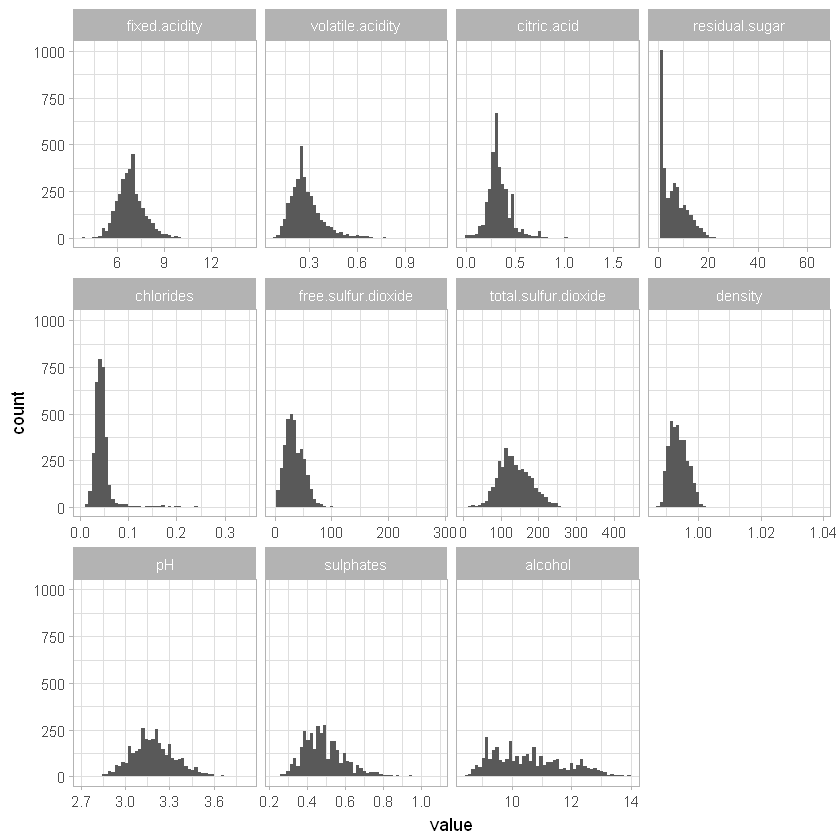

In [12]:
melted.training <- melt(training.file[1:(length(training.file)-1)])
histograms <- ggplot(data = melted.training, mapping = aes(x = value)) + 
                    geom_histogram(bins = 50) + facet_wrap(~variable, scales = 'free_x') + theme_light() 
histograms

At first glance, most of the variables appear to be normal, except for **residual sugar**, **chlorides**, and **alcohol**. To quantify the shape of the distribution, we can refer to the skewness and curtosis instead. 

In [13]:
cat("Skewness of variables")
col.skewness <- function(x){return(skewness(x))}
sort(apply(training.file[-12], 2, col.skewness))

cat("Kurtosis of variables")
col.kurtosis <- function(x){return(kurtosis(x))}
sort(apply(training.file[-12], 2, col.kurtosis))

Skewness of variables

total.sulfur.dioxide              alcohol                   pH 
           0.4606072            0.4648733            0.4765350 
       fixed.acidity            sulphates       residual.sugar 
           0.7329171            0.9491203            1.3794382 
             density          citric.acid     volatile.acidity 
           1.4063572            1.4233127            1.6399391 
 free.sulfur.dioxide            chlorides 
           1.7699876            4.9257889

Kurtosis of variables

alcohol                   pH total.sulfur.dioxide 
            2.295021             3.604296             3.750324 
           sulphates        fixed.acidity     volatile.acidity 
            4.607479             5.542497             8.447798 
      residual.sugar          citric.acid              density 
            9.407843            10.434901            19.167421 
 free.sulfur.dioxide            chlorides 
           19.170261            37.808548

Surprisingly, most of the variables appear to be symmetric, except for **chlorides**, because its coefficient of skewness is more than 2, indicating it is positively skewed. However, all of them are considered leptokurtic, with positive excess kurtosis. Some features have the potential to be normally distributed, like **fixed acidity**, **sulphates** and **total.sulfur.dioxide**.

### 2.4 Finding any relationships among variables

To find any *linear* correlation between two variables, we can just get their correlation coefficients since all of them are numerical variables. 

In [14]:
cor(training.data[-12])

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
fixed.acidity,1.00000000,-0.03133515,0.30135736,0.08330974,0.02287622,-0.05524392,0.076904341,0.26843608,-0.433662755,-0.016251679,-0.119797397
volatile.acidity,-0.03133515,1.00000000,-0.15641211,0.09343456,0.08216806,-0.09694925,0.099626139,0.05234912,-0.045001679,-0.020700790,0.052255406
citric.acid,0.30135736,-0.15641211,1.00000000,0.11501313,0.12690383,0.09212573,0.128813669,0.16784216,-0.183578541,0.058190005,-0.078497073
residual.sugar,0.08330974,0.09343456,0.11501313,1.00000000,0.07437767,0.29944285,0.397127315,0.82442297,-0.174532927,-0.021256591,-0.404692906
chlorides,0.02287622,0.08216806,0.12690383,0.07437767,1.00000000,0.10317620,0.192558889,0.24966833,-0.088812115,0.017447859,-0.358262237
free.sulfur.dioxide,-0.05524392,-0.09694925,0.09212573,0.29944285,0.10317620,1.00000000,0.625954107,0.29132899,-0.007354440,0.036514157,-0.252215553
total.sulfur.dioxide,0.07690434,0.09962614,0.12881367,0.39712731,0.19255889,0.62595411,1.000000000,0.52543437,0.009266154,0.130337823,-0.446703646
density,0.26843608,0.05234912,0.16784216,0.82442297,0.24966833,0.29132899,0.525434371,1.00000000,-0.070753647,0.072507626,-0.759878830
pH,-0.43366276,-0.04500168,-0.18357854,-0.17453293,-0.08881212,-0.00735444,0.009266154,-0.07075365,1.000000000,0.134862220,0.092981916
sulphates,-0.01625168,-0.02070079,0.05819000,-0.02125659,0.01744786,0.03651416,0.130337823,0.07250763,0.134862220,1.000000000,-0.009769726


To better see any correlations, it might be better to plot a heatmap instead. 

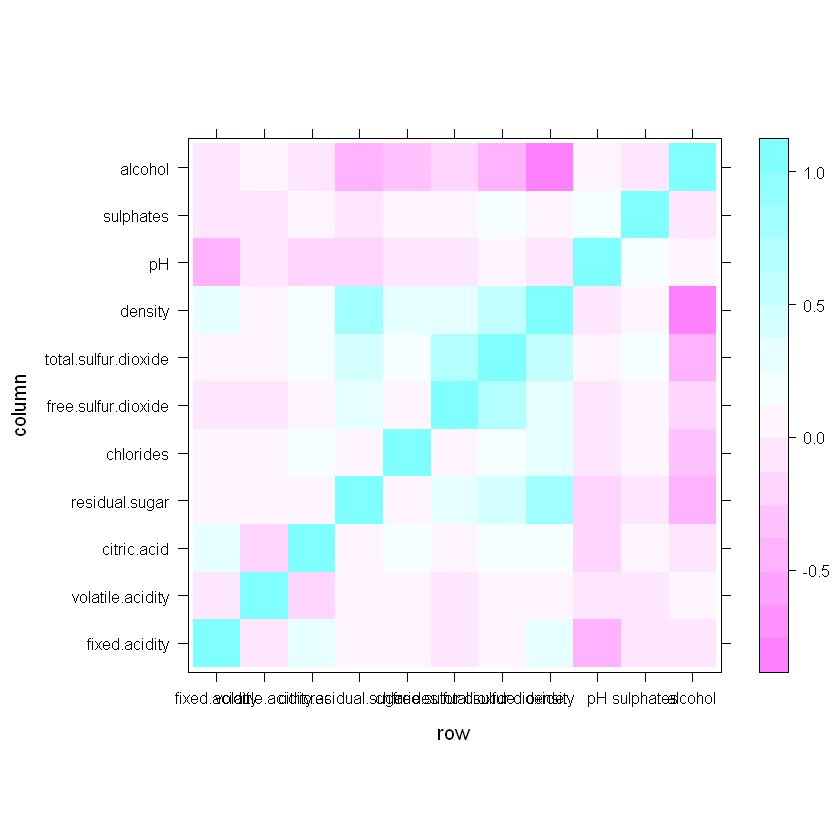

In [15]:
levelplot(cor(training.data[-12]))

**Which variables have positive correlations?**
- density and residual sugar (0.82)
- density and total sulfur dioxide (0.52)
- total sulfur dioxide and free sulfur dioxide (0.63)

**Which variables have negative correlations?**
- alcohol and residual sugar (-0.40)
- alcohol and chlorides (-0.36)
- alcohol and density (-0.76)
- alcohol and total sulfur dioxide (-0.45)
- pH and fixed.acidity (-0.43)

There is a strong positive correlation between **density and residual sugar**. This means that sugar significantly adds to a wine's density. There is also a significant positive correlation between total and free sulfur dioxide, and this chemical also adds to the wine's density.

Meanwhile, there is a strong negative correlation between **alcohol and density**. Denser wines tend to have less alcohol content. Furthermore, alcoholic wines tend to have less sulfur dioxide and sugar, and are less acidic.

The linear correlation can be further explored by creating a scatterplot matrix of the features as shown below. Most of the linear correlations are flat, meaning most of the variables are not linearly correlated with one another.

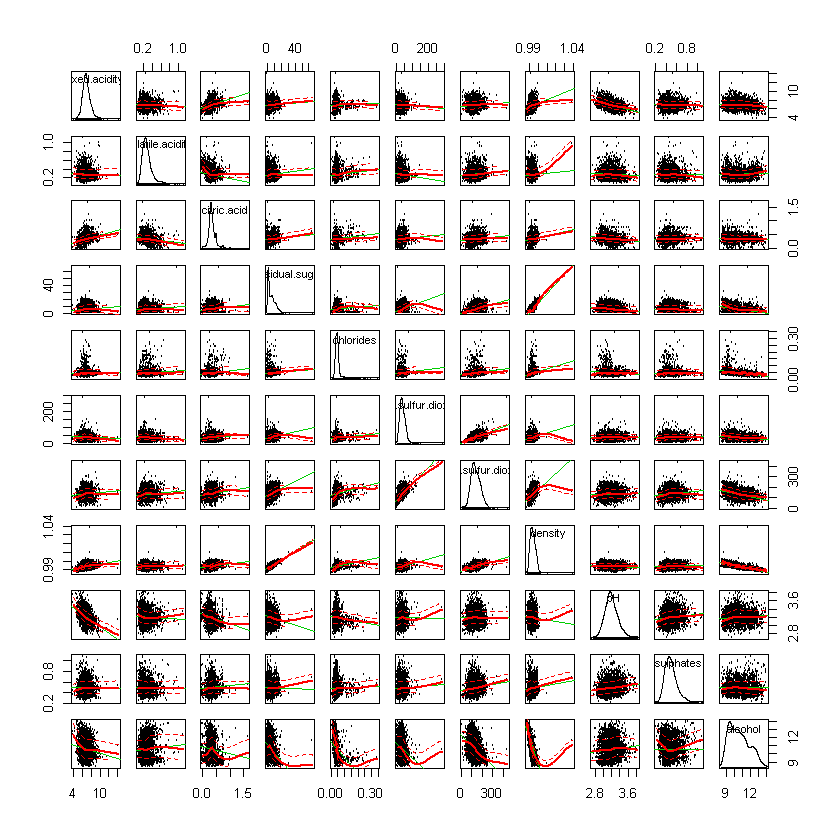

In [16]:
options(warn=-1)
scatterplotMatrix(training.file[1:11],cex=0.2)
options(warn=0)

To determine if any of the features are related to quality, we can try performing Chi-Square test of independence to the variables. To recap, this tests the null hypothesis *"Attribute A and Attribute B is independent of each other"*. If the resulting p-value of the statistic is less than 0.05, then we can reject the null hypothesis.

In [17]:
# turn off warnings for readability
options(warn=-1)

# perform chisquare test against zipcode to each of the variables
for(i in 1:9){
    m1 <- table(training.data$quality, training.data[,i])
    print(paste("quality and ", colnames(training.data[i])))
    print(chisq.test(m1)$p.value)
}
options(warn=0)

[1] "quality and  fixed.acidity"
[1] 3.022543e-06
[1] "quality and  volatile.acidity"
[1] 8.618356e-17
[1] "quality and  citric.acid"
[1] 3.614346e-27
[1] "quality and  residual.sugar"
[1] 4.189078e-07
[1] "quality and  chlorides"
[1] 8.031441e-27
[1] "quality and  free.sulfur.dioxide"
[1] 9.98727e-13
[1] "quality and  total.sulfur.dioxide"
[1] 7.342524e-16
[1] "quality and  density"
[1] 2.811677e-08
[1] "quality and  pH"
[1] 0.0003785295


All of the features have very low p-values, which suggests that each might be related to quality in their own way. 

## 3. Logistic Regression

The classifier for this assessment will be logistic regression model. It uses the logistic or sigmoid function to predict a data point's class, while maximum likelihood is used to fit the model and determine the feature weights. 

**Logistic Function**

$$
p(\mathcal{C}_k|x) = \sigma(\pmb{w}.\mathbf{x}) = \frac{1}{1 + e ^{-(u)}}
$$

$\text{where u} = \pmb{w_0} + \pmb{w_1}.\mathbf{x_1} + ... + \pmb{w_j}.\mathbf{x_j}$ is called the **log-odds** or **logit** that indicates how a probability may increase or decrease depending on the computed weights.

Note that the logistic function returns a result $[0, 1]$, which is why it is also $p(\mathcal{C}_k|x)$ or the probability of belonging to the class $\mathcal{C}_k$ given the data $\mathcal{x}$.

#### Building the Full Model

To be able to build a logistic regression model, the function `glm()` from the package `glmnet` is used. Since we are going to build the full model, we can input the formula as the `output_variable ~ .`. In particular, the model we are going to build has the formula

`quality ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + density + pH + sulphates + alcohol`

We can take a look at the coefficient and the statistics of the fitted model by calling `summary()`.

In [18]:
fit.glm <- glm(quality ~., data = training.data, family = binomial)
summary(fit.glm)


Call:
glm(formula = quality ~ ., family = binomial, data = training.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1121  -0.8539   0.4175   0.7762   2.4965  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           0.93936    0.04747  19.787  < 2e-16 ***
fixed.acidity        -0.06265    0.07090  -0.884 0.376928    
volatile.acidity     -0.66764    0.05254 -12.706  < 2e-16 ***
citric.acid           0.04370    0.04640   0.942 0.346292    
residual.sugar        0.58124    0.14972   3.882 0.000104 ***
chlorides            -0.01189    0.04551  -0.261 0.793807    
free.sulfur.dioxide   0.18939    0.05998   3.158 0.001590 ** 
total.sulfur.dioxide -0.07597    0.06451  -1.178 0.238945    
density              -0.46727    0.22936  -2.037 0.041621 *  
pH                    0.17695    0.06484   2.729 0.006351 ** 
sulphates             0.22261    0.05100   4.365 1.27e-05 ***
alcohol               1.10657    0.12771   8.665  < 

**Analysis of the full model**

**Z-score of the features:**
<br/>The z-score of the features works like the t-score in linear regression. The bigger the z-value, the more significant it is in determining the wine quality. In this case, the features **volatile.acidity**, **residual.sugar**, **free.sulfur.dioxide**, **density**, **pH**, **sulphates**, and **alcohol** are considered dependent to the resulting wine quality, while others are not relevant.

**Null and residual deviance:**
<br/>Null deviance indicates the goodness-of-fit when all other coefficients are 0 except the intercept. A decrease in residual deviance from null deviance indicates that the model with features explains the data better.

**AIC:**
<br/>The AIC of the model is 3251.2, and this sets the *baseline* of the AICs of the models coming from feature selection and regularization. A model that comes up with a leser AIC score is considered a better model.

Now let's try and predict the test set using the full model.

The metrics used to score the prediction are the predictive accuracy and the AUC score, which will be discussed further in the next sections.

In [19]:
cat("\nFull Model Train Prediction")
probs <- predict(fit.glm, training.data, type = "response")
pred.glm <- rep('good', length(probs))
pred.glm[probs < 0.5] <- 'bad'

acc<- confusionMatrix(pred.glm, training.data$quality, positive = 'good')$overall['Accuracy']
cat("\ntest data accuracy: ", acc)
auc <- roc(as.numeric(training.data$quality), as.numeric(factor(pred.glm)))$auc
cat("\ntest data auc: ", auc)
table(pred.glm, training.data$quality)


Full Model Train Prediction
test data accuracy:  0.762717
test data auc:  0.7103748

        
pred.glm  bad good
    bad   608  282
    good  497 1896

In [20]:
cat("\nFull Model Test Prediction")
probs <- predict(fit.glm, testing.data, type = "response")
pred.glm <- rep('good', length(probs))
pred.glm[probs < 0.5] <- 'bad'

acc<- confusionMatrix(pred.glm, testing.data$quality, positive = 'good')$overall['Accuracy']
cat("\ntest data accuracy: ", acc)
auc <- roc(as.numeric(testing.data$quality), as.numeric(factor(pred.glm)))$auc
cat("\ntest data auc: ", auc)
table(pred.glm, testing.data$quality)


Full Model Test Prediction
test data accuracy:  0.7079646
test data auc:  0.6534412

        
pred.glm bad good
    bad  112   67
    good 131  368

The overall accuracy of the prediction is quite low. Looks like the model is overfitting the data, because it considers a lot of features which may be unnecessary. The AUC score is also not that good, considering that the worst AUC score is 0.5.

When we create models with too many features, the obvious drawback is the tendency to have high variance, especially when the number of predictors *p* is greater than the number of data *n*, or a linear relationship between some of the features are not apparent. In order to reduce variance and model complexity, subset selection and regularization are employed. The aim is to find an optimal set of features that better describe the wine quality by reducing the number of features used, by decreasing the weights of the features, or both.

The next sections will describe these methods.

## 4. Stepwise Subset Selection

To improve upon the model created above, we can do feature selection using forward stepwise subset selection.

**Feature Selection**
 
*Feature selection* is a way of shrinking the model by selecting a subset of features that would yield the best score. In this case, we are going to select a subset of features by selecting the model with the best AUC (area under the ROC curve) score, accuracy, and balanced accuracy.

There are many ways to do this. One way is getting the score for all combinations of variables; this would mean producing $2^n$ models where $n = \text{number of variables}$. Because of the quantity of calculation, this is generally not recommended. The method we are going to use for feature selection is *forward stepwise subset selection*. This method considers a smaller set of combinations.

**Forward Stepwise Selection**

Forward stepwise selection begins with no predictors, and iteratively creating a model with *j* predictors where j is from 1 to *n*, the number of variables. The features that yield the best *additional* improvement to the model will be the best model with *j* predictors. The result is *n* models. 

We can select the best model by getting the best score by using the *one standard-error rule.*

**One Standard Error Rule**

According to the one standard error rule, the model that has a score which is *one standard error away from the best score* and has *the least number of variables* is the best model. We have to prefer the simplest model among the similarly good models in the set.

**Forward Stepwise Selection Algorithm**

The algorithm is as follows:

(1) From i in 1 to n (the number of features):

    1.1 From j to 1 to n (the number of features):
           1.1.1 if the current jth feature is not in the subset of selected features, 
                   - create a new model by adding this feature 
                   - perform k-fold cross validation on the created model by training the model using the k-1 folds and testing its performance using the remaining 1 fold
            1.1.2 get the mean score of the k-fold cross validation
            1.1.3 compare the computed mean score to the other mean scores of other features
            1.1.4 which ever has the best mean score will be the best model with *i* features
     
    1.2 Add the feature with the best additive improvement to the subset of selected features.

(2) Once we have generated models $\text{M}_1$ to $\text{M}_n$, 

`
   2.1 Compare the scores of the generated $n$ models.
   2.2 Pick the model with the best score.
   2.3 Get the standard error of the scores of the models.
   2.4 The final model will have a score that is within best.score +/- standard.error AND has the least number of variables.
 `
 
There are other ways of stepwise selection like **backward stepwise selection**, which iteratively *subtracts* features from the model, and **hybrid stepwise selection**, which adds the features one by one and then removes any feature that does not significantly improve the fit. They will not be assessed here.

There are many score metrics used to determine the best model, but for this assessment I have considered the following metrics:

1. **AUC (area under the ROC curve) score** - This is a robust metric which calculates the total area  taken by the model's ROC curve. **ROC (receiver operating characteristic) curve** is a graphical plot that tells about a binary classifier's performance by plotting the *true positive rate*, or sensitivity against the *false positive rate*, or 1 - specificity (nb: specificity is the *true negative rate*). This ranges from 0.5 to 1, where 1 is considered the best.

2. **Predictive Accuracy** - the basic classifier metric, which is the percentage of correct labels over the total number of data. This ranges from 0 to 1, where 1 means that all data are classified correctly.

3. **AIC (Akaike Information Criterion)** - this measure is derived from the model itself and not thru its predictions. It computes for the models' lack of fit using maximum likelihood. The lower the AIC, the better the model. 

In [21]:
# initialise data
test.models <- as.data.frame(matrix(nrow = 5, ncol = 3))
names(test.models) <- c('index', 'model', 'auc.score')
iter <- 1
set.seed(1234)

**Performing Stepwise Selection in R**

In deciding how to implement forward stepwise selection, I have checked the following methods: `regsubsets()` and `bestglm()`.

`regsubsets()` does perform subset selection, but since based from the examples this is only applicable to linear regression and I  have not seen this method used for logistic regression, I did not use this.

`bestglm()` is another function for selecting the best model, but you cannot force it to implement forward stepwise selection

So I have decided to create my own forward stepwise selection with k-fold cross validation. It consists of four different functions:

1. `stepwise()` - the main logic for forward stepwise selection. This selects the best model among $M_1$ to $M_n$.
2. `generate.stepwise.models()` - generates the models $M_1$ to $M_n$ by performing k-fold CV.
3. `cv.stepwise()` - performs k-fold CV and selects the best model $M_i$ with *i* features.
4. `compute.measure()` - computes different metrics that will be compared in k-fold CV.

In [22]:
#### Function that computes different measurement of model quality
### prediction - predicted values of the target variable
### actual - actual values of the target variable
### measure - can be auc (area under the ROC curve), accuracy (predictive accuracy), balanced.accuracy (balanced accuracy)
### returns: the computed measure
compute.measure <- function(prediction, actual, measure, positive){
    cv.measure <- 0
    
    # if the requested measure is AUC, call pROC's roc() function
    if (measure == 'auc'){
        cv.measure <- roc(as.numeric(actual), as.numeric(factor(prediction)))$auc
    }
    else if (measure == 'accuracy'){
        # first, check if the prediction and the actual vectors have the same levels
        # this is needed eg. if the predicted values are all positive
        pred.levels <- length(levels(as.factor(prediction)))
        ref.levels <- length(levels(actual))

        if (pred.levels != ref.levels){ 
            cv.measure <- 0 
        }
        else {
            # we need to call caret's confusionMatrix() function
            # which returns the accuracy and balanced accuracy
            cm <- confusionMatrix(prediction, actual, positive = positive)
            cv.measure <- cm$overall['Accuracy']
        }
    }
    
    return(cv.measure)
}

In [23]:
#### Function that performs k-fold CV for stepwise selection for logistic regression in 2 variables
### training.data - the training dataset
### positive - the positive class
### negative - the negative class
### measure - can be auc (area under the ROC curve), accuracy (predictive accuracy), balanced.accuracy (balanced accuracy)
### nfolds - the number of folds (k)
### returns: the mean measure computed after doing k-fold CV
cv.stepwise <- function(training.data, positive, negative, measure, nfolds){
    # perform K-fold CV to test a model with the current variable
    # nfolds <- 10
    
    #set.seed(12*runif(1, 0, 10))
    folds <- sample(1:nfolds, nrow(training.data), replace = TRUE)
    cv.measures <- c()

    for(k in 1:nfolds){
        #print(k)
        train <- training.data[folds!=k,]
        test <- training.data[folds==k,]
        
        fit.glm <- glm(quality ~., data = train, family = binomial)
        probs <- predict(fit.glm, test, type = "response")
        pred.glm <- rep(negative, length(probs))
        pred.glm[probs > 0.5] <- positive

        if (measure == 'auc' | measure == 'accuracy'){
            cv.measure <- compute.measure(pred.glm, test$quality, measure, positive)
        }
        else if (measure == 'aic') {
            cv.measure <- fit.glm$aic
        }
        cv.measures <- c(cv.measures, cv.measure)
    }

    # get the mean aucs of the folds
    mean.measure <- mean(cv.measures)
    
    return(list(meanMeasure = mean.measure))
}

In [24]:
#### Function that generates p stepwise models, where p is the number of features
### training.data - the training dataset
### measure - can be auc (area under the ROC curve), accuracy (predictive accuracy), balanced.accuracy (balanced accuracy)
### output - the target variable (eg. 'quality')
### positive - the positive class
### negative - the negative class
### returns: the p models and their corresponding metric values
generate.stepwise.models <- function(training.data, measure, output, positive, negative){
    
    # get the number of variables
    c <- ncol(training.data) - 1
    
    selected.features <- c()
    model.list <- list()
    best.feature <- ''
    
    model.df <- as.data.frame(matrix(nrow = 500, ncol = 3))
    names(model.df) <- c('features', 'vars', 'measure')   
    l <- 1
    
    # per row (i.e., the number of features)
    for (i in 1:c){
        
        best.measure <- if (measure == 'auc' | measure == 'accuracy') 0 else 10^10
         
        # iterate per feature and include them to the current model
        for(j in 1:c){
            # note: selected.features will have the features in the current model
            features <- if (i == 1)  c() else selected.features[1:(i-1)]
            var.name <- colnames(training.data[-ncol(training.data)])[j]
                
            #cat("\nselected features: ", selected.features)

            # if the current feature is not in the current model
            if (!(var.name %in% features)){
                features <- c(features, var.name, output)
                train <- training.data[,features]
                
                cv.response <- cv.stepwise(train, positive, negative, measure, 10)
                mean.measure <- cv.response$meanMeasure

                replace <- FALSE
                # for auc and accuracy, replace if the best is less than the current mean
                # for AIC, replace if the best is more than the current mean
                if (measure == 'accuracy' | measure == 'auc'){
                    replace <- mean.measure > best.measure 
                } else {
                    #cat('\nmean measure ', mean.measure, ' current best ', best.measure)
                    replace <- mean.measure <= best.measure
                }
                
                # compare the mean auc with the current largest auc
                if (replace){
                    best.measure <- mean.measure
                    best.feature <- var.name
                    # NOTE: uncomment the code below to better see how this algorithm works
                    #cat("features: ", features, "new auc: ", mean.measure, "\n")
                    model.df[i,'features'] <- paste(features[-(length(features))], collapse = ' + ')
                    model.df[i,'vars'] <- length(features) - 1
                    model.df[i,'measure'] <- mean.measure
                    #l <- l + 1
                }   
                
            }  

        }

        # add the best feature and form a new model        
        selected.features <- c(selected.features, best.feature)
                
        # store the metric of the current best model
        model.list[[best.feature]] <- best.measure
        
    }
            
    return(list(modelList = model.list, selectedFeatures = selected.features, modelsDF = model.df))
}

In [25]:
#################### STEPWISE MODEL SELECTION #########################
stepwise <- function(training.data, output, positive, negative, measure){

    # generate K models
    response <- generate.stepwise.models(training.data, measure, output, positive, negative)
    model.list <- response$modelList
    selected.features <- response$selectedFeatures
    model.df <- response$modelsDF

    # select the model with the best metric
    a <- unlist(model.list)
    
    best.metric <- if (measure == 'auc' | measure == 'accuracy') max(a) else min(a)
    
    cat("\nbest ", measure, ": ", best.metric,"\n")
    
    # perform one-standard error rule
    standard.error <- sd(a)/sqrt(length(a))
    upper <- best.metric + standard.error
    lower <- best.metric - standard.error
        
    cat("\nOne standard error rule: [", lower, ",", upper, "]")
    
    best.model <- selected.features[1:which(selected.features == names(a[which(a > lower & a < upper)])[1])]
    
    cat("\n\noptimal model features: ", best.model)
    cat("\nnumber of variables: ", length(best.model))

    # re-create the model to get the coefficients
    features <- c(best.model, output)
    train <- training.data[,features]
    sw.fit.glm <- glm(quality ~., data = train, family = binomial)
    print(summary(sw.fit.glm))
            
    return(list(bestModel = sw.fit.glm, modelsData = na.omit(model.df), includedFeatures = best.model))
}

After creating the functions I'm going to need. We can now produce the models. To recap, the forward stepwise subset selection (FSSS) models i'm going to produce are:

1. FSSS based on the model AUC score - the best model is selected among those who have the highest AUC score.
2. FSSS based on the model accuracy - the best model is selected among those who have the highest predictive accuracy.
3. FSSS based on the model AIC - the best model is selected among those who have the lowest AIC.

### 4.1 Forward Stepwise Subset Selection based on Model AUC Score

We first call the `stepwise()` method I created to perform stepwise selection and then analyze its results.

In [26]:
step.auc <- stepwise(training.data, 'quality', 'good', 'bad', 'auc')


best  auc :  0.7113508 

One standard error rule: [ 0.706885 , 0.7158166 ]

optimal model features:  alcohol volatile.acidity residual.sugar fixed.acidity
number of variables:  4
Call:
glm(formula = quality ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1762  -0.8953   0.4309   0.7935   2.3890  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.92658    0.04690  19.755  < 2e-16 ***
alcohol           1.32732    0.06009  22.091  < 2e-16 ***
volatile.acidity -0.72229    0.04949 -14.594  < 2e-16 ***
residual.sugar    0.30819    0.04577   6.734 1.65e-11 ***
fixed.acidity    -0.21311    0.04300  -4.956 7.20e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4194.0  on 3282  degrees of freedom
Residual deviance: 3267.6  on 3278  degrees of freedom
AIC: 3277.6

Number of Fisher Scoring ite

**Analysis of the results**

**K-fold CV AUC**:
<br/>Upon performing 10-fold cross validation, its mean AUC is computed to be around 0.71, which does not improve much on the full model's AUC.

**Chosen model**:
<br/>After considering the one standard error rule, results show that the method has picked 3 variables as the optimal features, namely **alcohol**, **volatile.acidity**, **residual.sugar**, and **fixed.acidity**. The coefficients of the chosen features are very high in magnitude, which indicates that these variables are significant.

`quality ~ alcohol + volatile.acidity + residual.sugar + fixed.acidity`

Note that in the full model, these features also yielded the lowest p-values.

**Null and residual deviance**:
<br/>The null deviance, which describes the performance of the model if we only include the intercept, is at around ~4200. The residual deviance at ~3300 indicates an improvement to the fit.

**AIC:**
<br/>The resulting AIC of 3277 is pretty similar to the full model's AIC of 3251. This means we were able to simplify the model without compromising the goodness-of-fit measure.

The table below shows how stepwise selection selected the best models per *j* features. 

In [27]:
step.auc$modelsData

features,vars,measure
alcohol,1,0.6615126
alcohol + volatile.acidity,2,0.6907325
alcohol + volatile.acidity + residual.sugar,3,0.7030342
alcohol + volatile.acidity + residual.sugar + fixed.acidity,4,0.7085137
alcohol + volatile.acidity + residual.sugar + fixed.acidity + pH,5,0.7109202
alcohol + volatile.acidity + residual.sugar + fixed.acidity + pH + free.sulfur.dioxide,6,0.7072705
alcohol + volatile.acidity + residual.sugar + fixed.acidity + pH + free.sulfur.dioxide + total.sulfur.dioxide,7,0.7069441
alcohol + volatile.acidity + residual.sugar + fixed.acidity + pH + free.sulfur.dioxide + total.sulfur.dioxide + sulphates,8,0.7113508
alcohol + volatile.acidity + residual.sugar + fixed.acidity + pH + free.sulfur.dioxide + total.sulfur.dioxide + sulphates + density,9,0.7100242
alcohol + volatile.acidity + residual.sugar + fixed.acidity + pH + free.sulfur.dioxide + total.sulfur.dioxide + sulphates + density + chlorides,10,0.7110649


### 4.2 Forward Stepwise Subset Selection based on Model Accuracy

In [28]:
step.accuracy <- stepwise(training.data, 'quality', 'good', 'bad', 'accuracy')


best  accuracy :  0.7632824 

One standard error rule: [ 0.7590543 , 0.7675105 ]

optimal model features:  alcohol volatile.acidity residual.sugar
number of variables:  3
Call:
glm(formula = quality ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0811  -0.8962   0.4441   0.7935   2.3802  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.91291    0.04639  19.677  < 2e-16 ***
alcohol           1.32692    0.05965  22.245  < 2e-16 ***
volatile.acidity -0.70393    0.04884 -14.413  < 2e-16 ***
residual.sugar    0.29616    0.04567   6.485 8.89e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4194.0  on 3282  degrees of freedom
Residual deviance: 3292.5  on 3279  degrees of freedom
AIC: 3300.5

Number of Fisher Scoring iterations: 5



**Analysis of the results**

**K-fold CV AUC**:
<br/>Upon performing 10-fold cross validation, its mean accuracy is computed to be 0.76, which is very similar to the accuracy of the full data without cross validation.

**Chosen model**:
<br/>After considering the one standard error rule, results show that the method has picked 3 variables as the optimal features, namely **alcohol**, **volatile.acidity**, and **residual.sugar**. The coefficients of the chosen features are very high in magnitude, which indicates that these variables are significant.

`quality ~ alcohol + volatile.acidity + residual.sugar`

**Null and residual deviance**:
The residual deviance is lower than the null deviance which describes an improvement on the fit when the features were added to the model.

**AIC**:
The resulting AIC is 3300, which is an increase from the full model.


In [29]:
step.accuracy$modelsData

features,vars,measure
alcohol,1,0.7155714
alcohol + volatile.acidity,2,0.7489107
alcohol + volatile.acidity + residual.sugar,3,0.7607188
alcohol + volatile.acidity + residual.sugar + free.sulfur.dioxide,4,0.7618225
alcohol + volatile.acidity + residual.sugar + free.sulfur.dioxide + citric.acid,5,0.7619598
alcohol + volatile.acidity + residual.sugar + free.sulfur.dioxide + citric.acid + total.sulfur.dioxide,6,0.7610138
alcohol + volatile.acidity + residual.sugar + free.sulfur.dioxide + citric.acid + total.sulfur.dioxide + sulphates,7,0.7606728
alcohol + volatile.acidity + residual.sugar + free.sulfur.dioxide + citric.acid + total.sulfur.dioxide + sulphates + pH,8,0.7615558
alcohol + volatile.acidity + residual.sugar + free.sulfur.dioxide + citric.acid + total.sulfur.dioxide + sulphates + pH + fixed.acidity,9,0.7632824
alcohol + volatile.acidity + residual.sugar + free.sulfur.dioxide + citric.acid + total.sulfur.dioxide + sulphates + pH + fixed.acidity + chlorides,10,0.7617774


### 4.3 Forward Stepwise Subset Selection based on Model AIC
When getting the best subset of features based on AIC, we have to get the feature that has the smallest AIC.

In [30]:
step.aic <-  stepwise(training.data, 'quality', 'good', 'bad', 'aic')


best  aic :  2922.866 

One standard error rule: [ 2897.217 , 2948.515 ]

optimal model features:  alcohol volatile.acidity residual.sugar fixed.acidity sulphates
number of variables:  5
Call:
glm(formula = quality ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1068  -0.8794   0.4276   0.7822   2.4777  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.93216    0.04709  19.796  < 2e-16 ***
alcohol           1.33749    0.06035  22.162  < 2e-16 ***
volatile.acidity -0.72638    0.04999 -14.531  < 2e-16 ***
residual.sugar    0.30929    0.04604   6.718 1.84e-11 ***
fixed.acidity    -0.21335    0.04291  -4.973 6.61e-07 ***
sulphates         0.20228    0.04744   4.263 2.01e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4194.0  on 3282  degrees of freedom
Residual deviance: 3248.9  on 

**Analysis of the results**

**K-fold CV AUC**:
<br/>Upon performing 10-fold cross validation, its mean AIC is computed to be around 2922, which is an improvement to the AIC of the full model.

**Chosen model**:
<br/>After considering the one standard error rule, results show that the method has picked 5 variables as the optimal features, namely **alcohol**, **volatile.acidity**, **residual.sugar**, **fixed acidity**, and **sulphates**. The coefficients of the chosen features are very high in magnitude, which indicates that this variable is significant. However, we can notice that the magnitude of the coefficients decrease as we add more features, showing that these features are less significant.

`quality ~ alcohol + volatile.acidity + residual.sugar + fixed.acidity + sulphates`

**Null and residual deviance**:
<br/>The null deviance, which describes the performance of the model if we only include the intercept, is at around ~4200. The residual deviance at ~3300 indicates an improvement to the fit.

**AIC:**
<br/>The resulting AIC of 3260 is pretty similar to the full model's AIC of 3251. This means we were able to simplify the model without compromising the goodness-of-fit measure.

The table below shows how stepwise selection selected the best models per *i* features. 

In [31]:
step.aic$modelsData

features,vars,measure
alcohol,1,3210.032
alcohol + volatile.acidity,2,3008.069
alcohol + volatile.acidity + residual.sugar,3,2970.836
alcohol + volatile.acidity + residual.sugar + fixed.acidity,4,2950.382
alcohol + volatile.acidity + residual.sugar + fixed.acidity + sulphates,5,2935.500
alcohol + volatile.acidity + residual.sugar + fixed.acidity + sulphates + free.sulfur.dioxide,6,2927.573
alcohol + volatile.acidity + residual.sugar + fixed.acidity + sulphates + free.sulfur.dioxide + pH,7,2927.118
alcohol + volatile.acidity + residual.sugar + fixed.acidity + sulphates + free.sulfur.dioxide + pH + density,8,2922.866
alcohol + volatile.acidity + residual.sugar + fixed.acidity + sulphates + free.sulfur.dioxide + pH + density + total.sulfur.dioxide,9,2923.725
alcohol + volatile.acidity + residual.sugar + fixed.acidity + sulphates + free.sulfur.dioxide + pH + density + total.sulfur.dioxide + citric.acid,10,2925.138


### 4.4 Analysis of Stepwise Logistic Regression Models

In here, I plotted the performance of the different stepwise models created. To do this, I used `ggplot`'s `qplot()` to make a pretty scatterplot. The selected number of features (blue) and the feature with the best metric (red) are highlighted. 

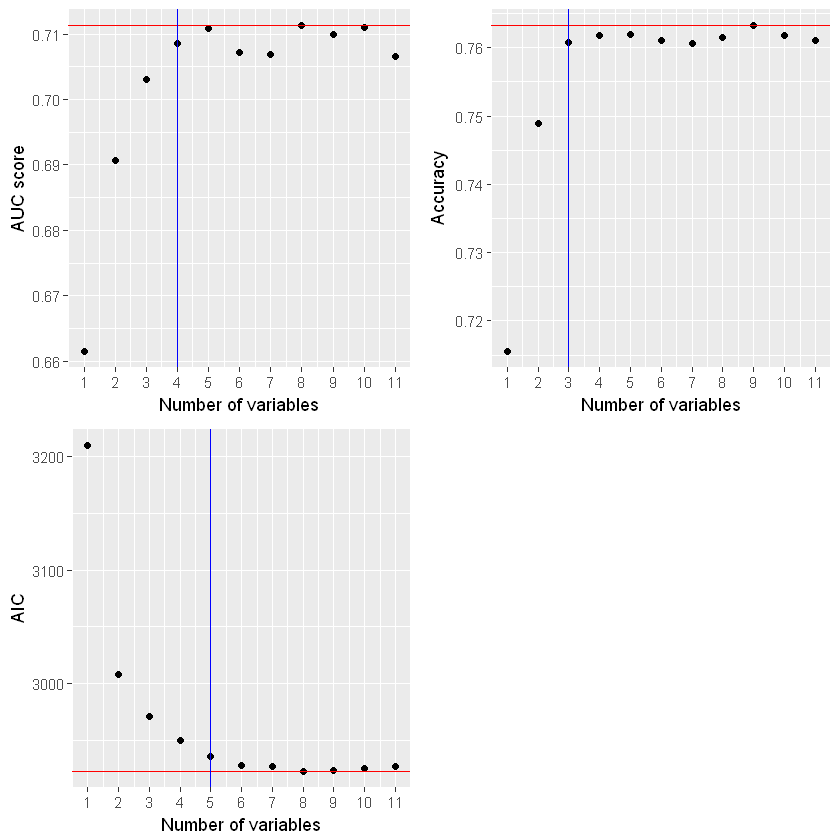

In [32]:
######################## Plot the model performance ##############################

# aggregate by getting the max measures per variable qty.
auc.data <- step.auc$modelsData[-1] 
auc.measure <- aggregate(auc.data, by = list(variables = auc.data$vars), FUN = max)

acc.data <- step.accuracy$modelsData[-1]
acc.measure <- aggregate(acc.data, by = list(variables = acc.data$vars), FUN = max)

aic.data <- step.aic$modelsData[-1]
aic.measure <- aggregate(aic.data, by = list(variables = aic.data$vars), FUN = min)

# get the x-intercept aka the number of variables in the model
auc.xint <- length(step.auc$includedFeatures)
acc.xint <- length(step.accuracy$includedFeatures)
aic.xint <- length(step.aic$includedFeatures)

# plot them
auc.plot <- qplot(auc.measure$variables, auc.measure$measure, xlab = 'Number of variables', ylab = 'AUC score') 
auc.plot <- auc.plot + geom_hline(yintercept = max(auc.measure$measure), color = 'red') + scale_x_continuous(breaks = c(1:11))
auc.plot <- auc.plot + geom_vline(xintercept = auc.xint, color = 'blue')

acc.plot <- qplot(acc.measure$variables, acc.measure$measure, xlab = 'Number of variables', ylab = 'Accuracy')
acc.plot <- acc.plot + geom_hline(yintercept = max(acc.measure$measure), color = 'red') + scale_x_continuous(breaks = c(1:11))
acc.plot <- acc.plot + geom_vline(xintercept = acc.xint, color = 'blue')

aic.plot <- qplot(aic.measure$variables, aic.measure$measure, xlab = 'Number of variables', ylab = 'AIC')
aic.plot <- aic.plot + geom_hline(yintercept = min(aic.measure$measure), color = 'red') + scale_x_continuous(breaks = c(1:11))
aic.plot <- aic.plot + geom_vline(xintercept = aic.xint, color = 'blue')

grid.arrange(auc.plot, acc.plot, aic.plot, ncol=2)

**Analysis**

The graphs show that the metric values converge as the number of variables increase, and that the stepwise algorithm is selecting the number of variables where the convergence starts. This illustrates the **importance of using the one-standard error rule**. Due to the randomness and uncertainty introduced in cross-validation, the resulting AUCs, accuracies, and AICs of the models will fluctuate within a specific range, so it is more prudent to take this into account and pick the simplest model. 

**Testing the Models**

The three derived models can now be used against the test data to assess their performance.

In [33]:
positive <- 'good'
negative <- 'bad'

# predict the test data using the model
probs <- predict(step.auc$bestModel, testing.data, type = "response")
pred.glm <- rep(positive, length(probs))
pred.glm[probs < 0.5] <- negative
acc<- confusionMatrix(pred.glm, testing.data$quality, positive = positive)$overall['Accuracy']
cat("\ntest data accuracy: ", acc)
auc <- roc(as.numeric(testing.data$quality), as.numeric(factor(pred.glm)))$auc
cat("\ntest data auc: ", auc)
test.models[iter,'index'] <- iter
test.models[iter,'model'] <- 'stepwise - AUC'
test.models[iter,'auc.score'] <- auc
iter <- iter + 1


test data accuracy:  0.7020649
test data auc:  0.6443025

In [34]:
# predict the test data using the model
probs <- predict(step.accuracy$bestModel, testing.data, type = "response")
pred.glm <- rep(positive, length(probs))
pred.glm[probs < 0.5] <- negative
acc<- confusionMatrix(pred.glm, testing.data$quality, positive = positive)$overall['Accuracy']
cat("\ntest data accuracy: ", acc)
auc <- roc(as.numeric(testing.data$quality), as.numeric(factor(pred.glm)))$auc
cat("\ntest data auc: ", auc)
test.models[iter,'index'] <- iter
test.models[iter,'model'] <- 'stepwise - Accuracy'
test.models[iter,'auc.score'] <- auc
iter <- iter + 1


test data accuracy:  0.7020649
test data auc:  0.6452107

In [35]:
# predict the test data using the model
probs <- predict(step.aic$bestModel, testing.data, type = "response")
pred.glm <- rep(negative, length(probs))
pred.glm[probs > 0.5] <- positive
acc<- confusionMatrix(pred.glm, testing.data$quality, positive = positive)$overall['Accuracy']
cat("\ntest data accuracy: ", acc)
auc <- roc(as.numeric(testing.data$quality), as.numeric(factor(pred.glm)))$auc
cat("\ntest data auc: ", auc)
test.models[iter,'index'] <- iter
test.models[iter,'model'] <- 'stepwise - AIC'
test.models[iter,'auc.score'] <- auc
iter <- iter + 1


test data accuracy:  0.7064897
test data auc:  0.6513836

In [36]:
cat("Test Predictions AUC Scores")
na.omit(test.models)

Test Predictions AUC Scores

index,model,auc.score
1,stepwise - AUC,0.6443025
2,stepwise - Accuracy,0.6452107
3,stepwise - AIC,0.6513836


** How are the performance of the models versus the test set?**

Performance-wise, the results of the models are very underwhelming. The model at its most basic (or dumbest) could predict everything as 'good' and would still have 0.64 accuracy $\frac{435}{(435+243)}$ and 0.5 auc score. A 5% improvement in accuracy and 15% improvement in AUC score is not really a huge leap forward. However, it is still an improvement with respect to the full model, because the resulting accuracy and auc scores are the same, even with lesser features.

## 5. Regularization

The next method of improving fit is by using *regularization*. Regularization works by adding a *shrinkage penalty* to the existing model that reduces the coefficients (or the weights) of the features and leads to a drop in the model's variance. 

As seen in the part 4 of the assessment, performing stepwise selection is an onerous task, and this becomes an issue as the number of features reach to $\infty$. The preferred alternative, therefore, is to just add a penalty to the existing model in order to shrink the coefficients to zero and prevent overfitting.

The objective of regularization, then, is to minimize the error function

$$
E(\pmb{w}) = \sum_{i=1}^{n} (\pmb{y}_\text{pred} - \pmb{y}_i)^2 + \lambda *\sum_{j=1}^{m}(||\pmb{w}_j||^q)
$$

where

$\pmb{y}_\text{pred} = \pmb{w_0} + \pmb{w_1}.\mathbf{x_1} + ... + \pmb{w_i}.\mathbf{x_i}$ which is called the odds of logistic regression.

Note: the main feature of regularization is just the added term "$\lambda *||\pmb{w}||^q$" that forces the coefficients to shrink.

There are two types of regularization, depending on the value of **q** above:

1. **Ridge Regularization** - also known as L2 penalty, this is when q = 2.  
2. **Lasso Regularization** - also known as L1 penalty, this is when q = 1.

The shrinking effect of these two regularizations will be further discussed below.

**Tuning Shrinkage Penalty**

The goal of selecting the best shrinkage penalty, $\lambda$, is very important to regularization. This is related to the bias-variance tradeoff. An increased $\lambda$ leads to a (dramatic) decrease in variance but only a (slight) increase in bias. On the other hand, as $\lambda$ approaches 0, the variance increases. An intermediate value of $\lambda$ will lead to a moderate level of variance and minimal bias that may result to better predictions. To select the best shrinkage penalty, we may resort to performing cross validation over a list of $\lambda$ values and select the $\lambda$ that yields the best score (in our case, the AUC score).


**Performing Regularization in R**

To perform regularization I will use the `glmnet` package. This library has a robust method called `cv.glmnet()` that enables you to find the best $\lambda$ by performing 10-fold CV. The resulting "best" $\lambda$ is then used to re-fit using all of the variables with the updated tuning parameter.

In [37]:
cv.regularization <- function(training.data, regularization){
    
    positive <- 'good'
    negative <- 'bad'
    
    alpha <- 0
    if (regularization == 'lasso'){ alpha <- 1 }

    training.mat <- model.matrix(quality ~ ., data = training.data)[,-1]
        
    cv.model <- cv.glmnet(training.mat, 
                      training.data$quality, 
                      alpha = alpha,
                      family = 'binomial')
    best.lambda <- cv.model$lambda.min
    leastsq.mod <- glmnet(training.mat, 
                          training.data$quality, 
                          alpha = alpha, 
                          family = 'binomial')

    # print the results
    cat("\nBest ", regularization, " lambda: ", best.lambda, "\n")
    cat(regularization," model train auc: ", max(cv.model$cvm))
    model.coef <- predict(leastsq.mod, type="coefficients", s = best.lambda)[1:ncol(training.data),]
    cat("\n\nModel coefficients:\n")
    print(model.coef)
        
    return(list(cvModel = cv.model, bestLambda = best.lambda, coefficients = model.coef, lsModel = leastsq.mod))
}

In [38]:
# plot the lambda v coefficients
# taken from Haffari, Gholamreza "Linear Models for Regression" (2017)
plot.coefficients <- function(fit){
    out <- as.data.frame(as.matrix(t(fit$beta)))
    out[,c('nonzero', 'lambda')] <- c(fit$df, fit$lambda)

    # reshape the outputs (for plotting)
    out.m<-melt(out, id=c('lambda', 'nonzero'))
    names(out.m) <- c('lambda', 'nonzero', 'feature', 'coefficient')

    # plot coefficients vs lambda 
    g <- ggplot(data = out.m, aes(x=log(lambda), y=coefficient, color=factor(feature))) + geom_line() +
        ggtitle('Coefficients vs. log(Lambda)') + theme_minimal()
    print(g)
}

### 5.1 Ridge (L2) Regularization

To recap, ridge regularization adds the square of the weights in minimizing the coefficients:

$$
+ \lambda *\sum_{j=1}^{m}(\pmb{w}_j^2)
$$

where $\lambda$ is the shrinkage penalty and $\pmb{w}$ are the coefficients or the weights.

Ridge regularization shrinks the coefficient of the features near 0. As $\lambda$ approaches 0, we get the least squares solution, and as $\lambda$ approaches $\infty$, the coefficients are decreased and converges near 0. Note that this will only shrink the coefficients, and will not turn them into 0. 

In [39]:
ridge.result <- cv.regularization(training.data,'ridge')
cv.ridge <- ridge.result$cvModel


Best  ridge  lambda:  0.02128708 
ridge  model train auc:  1.277773

Model coefficients:
         (Intercept)        fixed.acidity     volatile.acidity 
          0.86735847          -0.08889248          -0.53236387 
         citric.acid       residual.sugar            chlorides 
          0.04953674           0.33250174          -0.07830202 
 free.sulfur.dioxide total.sulfur.dioxide              density 
          0.17610615          -0.10468944          -0.28385123 
                  pH            sulphates              alcohol 
          0.13152792           0.17546760           0.89596963 


In [40]:
#?glmnet

**Analysis**
<br/>Based on cross validation for ridge regularization, the best lambda is **0.021**. Meanwhile, it can be seen that Ridge Regularization indeed shrank the feature coefficients. However, because the lambda is close to 0, the shrinkage is to a lesser degree. In particular, the features **volatile.acidity**, **residual.sugar**, **chlorides**, **density**, **pH**, **sulphates**, and **alcohol** were penalized.

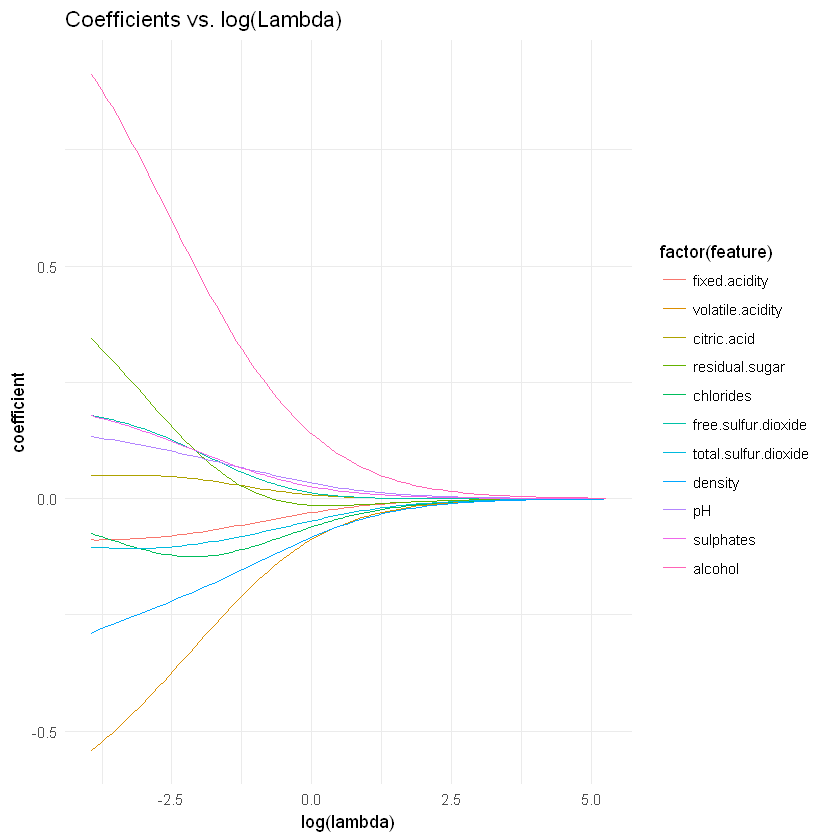

In [41]:
plot.coefficients(cv.ridge$glmnet.fit)

As shown in this graph, the feature coefficients are already small due to data normalization, and as log(lambda) increases, the coefficients' values get closer to 0, although they never become 0. This is the main difference between Ridge and Lasso. Lasso produces **sparse** models--that is, models that uses a subset of features, while Ridge does not. 

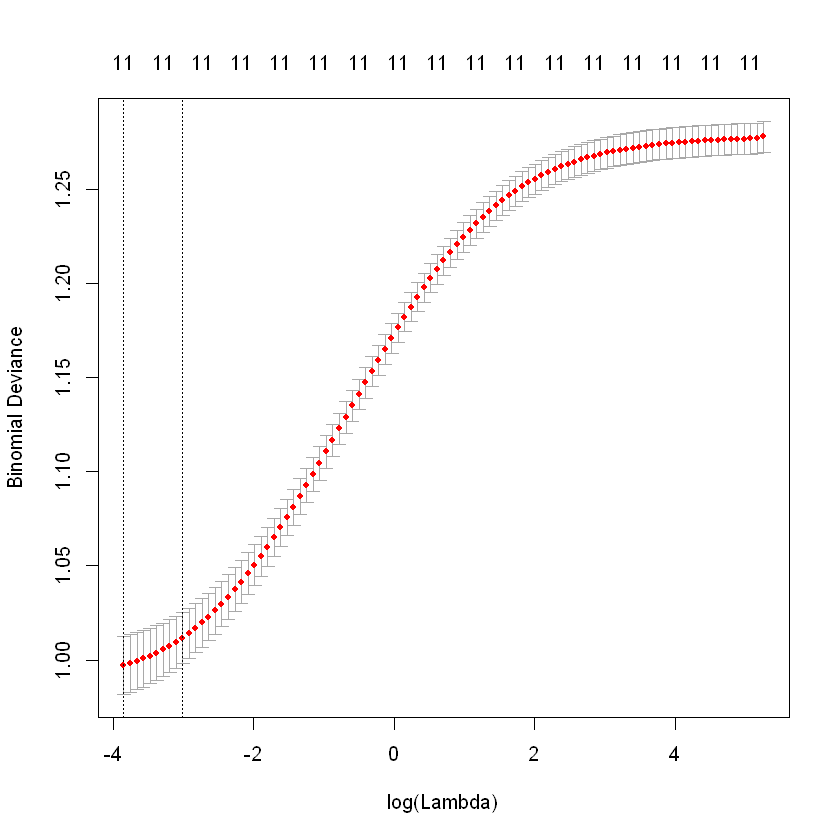

In [42]:
plot(cv.ridge)

The plot above shows `cv.glmnet()`'s performance in selecting the best lambda. Based on this, we can see that lower lambdas produces higher AUC scores than higher lambdas.

### 5.2 Lasso (L1) Regularization

Meanwhile, lasso regularization adds the absolute value of the weights in minimizing the coefficients:

$$
+ \lambda *\sum_{j=1}^{m}(|{\pmb{w}_j}|)
$$

where $\lambda$ is the shrinkage penalty and $\pmb{w}$ are the coefficients or the weights.

Lasso regularization also shrinks the coefficients, but it yields sparse models. As $\lambda$ approaches $\infty$, the redundant features shrank to 0, thereby removing it from the model. In this way lasso regularization also performs feature selection, as only the variables it deems important is retained from the model. Ridge, meanwhile, preserves all the features.

In [43]:
set.seed(12345)
lasso.result <- cv.regularization(training.data, 'lasso')
cv.lasso <- lasso.result$cvModel


Best  lasso  lambda:  0.004694079 
lasso  model train auc:  1.276495

Model coefficients:
         (Intercept)        fixed.acidity     volatile.acidity 
          0.90815017          -0.14098406          -0.64788792 
         citric.acid       residual.sugar            chlorides 
          0.00000000           0.22527337          -0.01553774 
 free.sulfur.dioxide total.sulfur.dioxide              density 
          0.13641664          -0.01586404           0.00000000 
                  pH            sulphates              alcohol 
          0.06159732           0.15200454           1.25968301 


**Analysis**
<br/>Based on the cross validation performed for Lasso regularization, the best lambda would be **0.005**. Several coefficients were removed from the model, like density and citric acid, resulting to a total of 9 variables. Density might have been removed because it is correlated to the residual sugar, while citric acid is removed because it is correlated to the fixed.acidity.

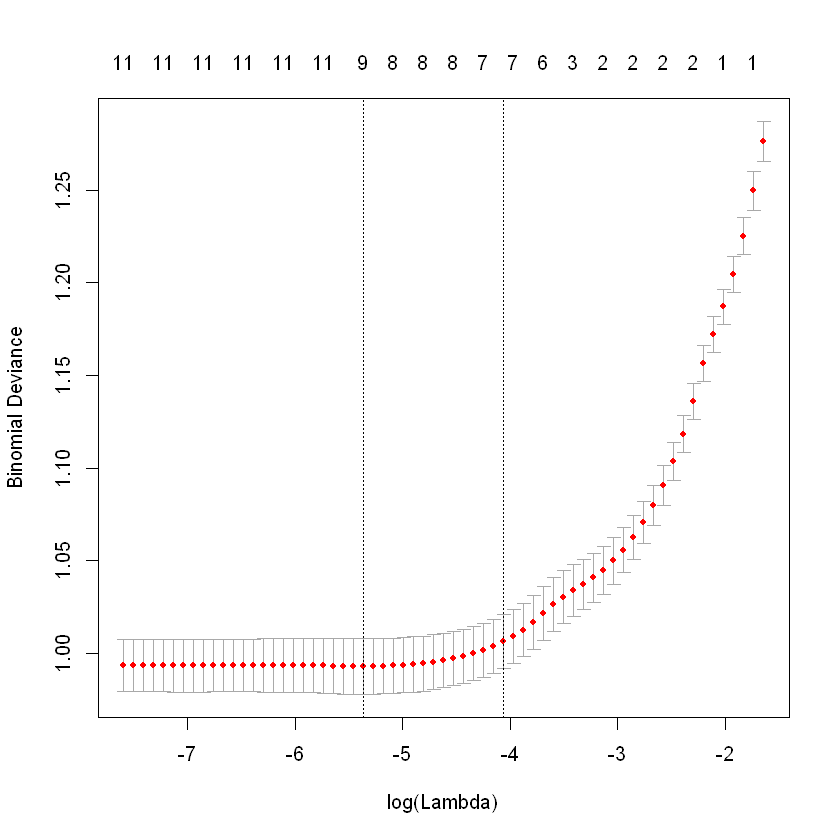

In [44]:
plot(cv.lasso)

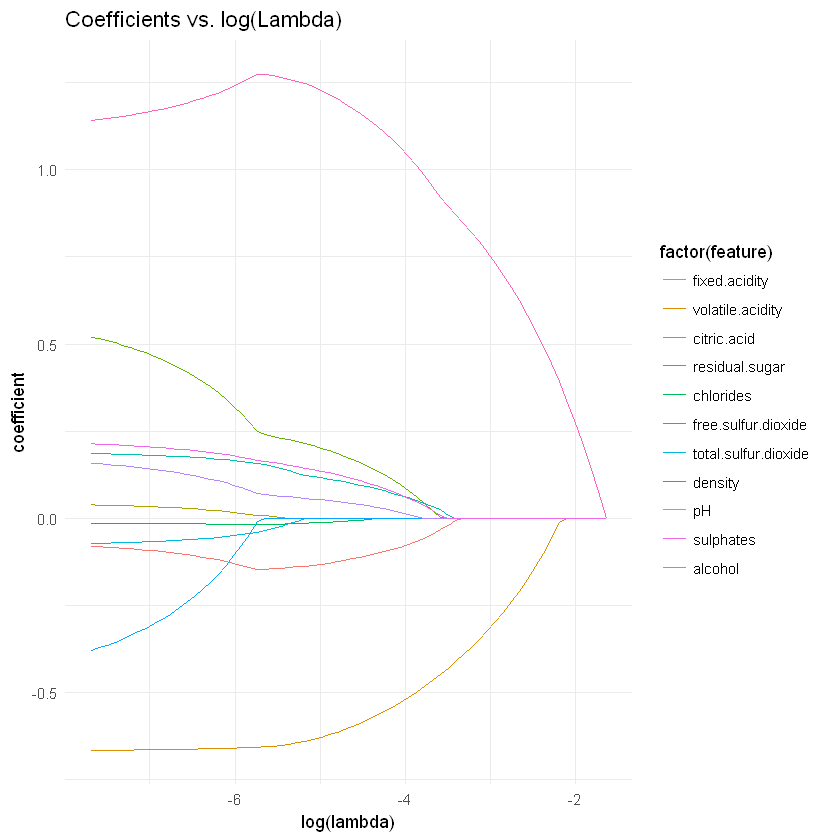

In [45]:
plot.coefficients(cv.lasso$glmnet.fit)

The plot above shows how Lasso regularization removes the features it deems less important to the model. Looking from right to left, it considers **alcohol** as the most relevant feature, followed by **volatile.acidity**, and then with **fixed acidity** and **free.sulfur.dioxide**.

In [50]:
testing.data

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
-2.1634204,-0.45327591,-0.49039866,1.42476605,-0.67361025,-0.005726945,-0.37984617,0.70231610,-0.84826819,0.086390071,-1.0347280,good
-0.8953111,1.24785288,-0.83019456,-0.94739107,0.91539903,-0.696014690,0.29309792,-0.31480473,0.66712809,-0.178244574,-0.8412782,bad
-0.4341804,0.66460872,1.54837675,0.54495191,0.42986842,1.087228652,0.94361054,0.56125555,-0.51883422,-0.354667671,-0.8689139,bad
-1.8175724,1.19924920,-1.50978636,-0.86943286,-0.32049708,-1.386302435,-2.03977491,-0.83821363,2.11663758,-0.795725414,0.7892269,bad
-1.1258764,0.08136457,-0.49039866,-0.83602219,0.73884244,-0.983634584,0.11364616,-0.78995607,0.20592053,-1.236783157,0.3746917,good
0.6033636,0.66460872,2.90756036,0.65632079,0.34159012,-1.386302435,-0.78361262,0.88792209,-0.05762665,0.086390071,0.2088776,bad
-1.8175724,-0.69629431,-0.15060276,-0.81374842,0.12089439,-0.983634584,-1.65843993,-1.47669824,0.27180732,-1.060360060,1.1208551,good
-0.2036150,0.56740136,0.61393802,0.61177323,0.03261610,1.950088334,0.78659025,0.53155859,-0.32117383,0.086390071,-0.9103674,good
-1.8175724,0.17857193,0.10424417,-0.85829597,-0.32049708,-0.926110605,-0.87333850,-1.51753156,2.38018476,-0.090033026,1.9499255,good
-0.6647457,-1.27953846,-0.49039866,1.25771273,-0.45291452,0.684560801,-0.42470911,0.93246753,-0.51883422,-0.972148511,-1.2834491,good


In [46]:
testing.mat <- model.matrix(quality ~ ., data = testing.data)[,-1]

# predict test data using the ridge regression model
probs <- predict(ridge.result$lsModel, s = cv.ridge$lambda.min, newx=testing.mat, type = "response")
pred.glm <- rep('good', length(probs))
pred.glm[probs < 0.5] <- 'bad'

auc <- roc(as.numeric(testing.file$quality), as.numeric(factor(pred.glm)))$auc

cat("\nRidge model test auc: ", auc)

test.models[iter,'index'] <- iter
test.models[iter,'model'] <- 'regularization - Ridge'
test.models[iter,'auc.score'] <- auc
iter <- iter + 1

probs <- predict(lasso.result$lsModel, s = cv.lasso$lambda.min, newx=testing.mat, type = "response")
pred.glm <- rep('good', length(probs))
pred.glm[probs < 0.5] <- 'bad'

auc <- roc(as.numeric(testing.data$quality), as.numeric(factor(pred.glm)))$auc
cat("\nLasso model test auc: ", auc)

test.models[iter,'index'] <- iter
test.models[iter,'model'] <- 'regularization - Lasso'
test.models[iter,'auc.score'] <- auc
iter <- iter + 1


Ridge model test auc:  0.6487158
Lasso model test auc:  0.648659

## 6. Comparison Between Feature Selection and Regularization

Let us now recap the resulting models we have created.

full model:

`
quality ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + density + pH + sulphates + alcohol
`

forward stepwise selection with AUC score

`
quality ~ alcohol + volatile.acidity + residual.sugar + fixed.acidity
`

forward stepwise selection with accuracy score

`
quality ~ alcohol + volatile.acidity + residual.sugar
`

forward stepwise selection AIC score

`
quality ~ alcohol + volatile.acidity + residual.sugar + fixed.acidity + sulphates
`

Ridge regularization

`
quality ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + density + pH + sulphates + alcohol + L2 penalty
`

Lasso regularization

`
quality ~ fixed.acidity + volatile.acidity + residual.sugar + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + pH + sulphates + alcohol + L1 penalty
`

Let us also see the AUC scores of the models.

In [47]:
test.models

index,model,auc.score
1,stepwise - AUC,0.6443025
2,stepwise - Accuracy,0.6452107
3,stepwise - AIC,0.6513836
4,regularization - Ridge,0.6487158
5,regularization - Lasso,0.6486590


In [48]:
#?predict.glmnet

Results show that the models using feature selection and regularization perform at the same rate as the full model. The performance is similar if we take into account the uncertainty brought by cross validation. On the bright side, the models produced are simpler and has lesser variance without a significant drop in performance.

**Advantages and Disadvantanges of the Three Methods Used**

**Forward Stepwise Selection**

Advantages 
- Reduces the complexity of the model because it does not use all features
- Better and faster than subset selection because it has less model combinations to consider
- We can analyse the intermediate effect of applying different combinations of variables to the model

Disadvantages 
- Computationally expensive and harder to implement than regularization
- Needs to contain the features of the previously created Model, so is not 100% sure to find the optimal combination of features
- Tends to have high variance because it is instensely trained to fit the training data  


**Ridge Regularization**

Advantages 
- Easier to implement than both Stepwise Selection and Lasso Regularization as it does not yield sparse model
- Reduces the risk of overfitting by penalizing the parameters

Disadvantages 
- May lead to a biased model if a wrong lambda is picked as it might penalize relevant variables
- Has a higher chance to overfit than both Stepwise and Lasso because it does not remove any features


**Lasso Regularization**

Advantages 
- Computationally better than Stepwise Selection in generating sparse models
- Reduces the risk of overfitting by penalizing the parameters
- Creates a simpler model than Ridge Regularization

Disadvantages 
- May lead to a biased model if a wrong lambda is picked as it might remove relevant variables
- Deems correlated features as redundant variables

What is the best model?

In [49]:
# get the best model
subset(test.models, auc.score == max(auc.score))

,index,model,auc.score
3,3,stepwise - AIC,0.6513836


Based on the **AUC scores**, the best model is the **Stepwise Selection based in AIC scoring**, followed by **Ridge Regularization and Lasso Regularization**. What does this say? It is preferred to look at the model's inherent characteristics (like the coefficients, number of parameters, etc.) than the model's predictive performance on the training data. In this scenario, looking at the AIC score and penalizing the coefficients are more effective than looking at the best AUC score. It is more important to create a *generalized* model to account for the uncertainty of the test data. Otherwise, your model might be overfitted.

However, in comparing them against the full model, the three models failed to improve accuracy. The full model's performance against the test data outperforms all the models in terms of the AUC (albeit to a very small degree). Again, the benefit gained from feature selection and regularization is to preserve the model's predictive performance while reducing its complexity by removing features or shrinking its coefficients.

**Recommendations**

What can be implied from these findings?
- A linear model may not be suited to the dataset. Looking at the statistics of the data alone does not show any *linear* relationship between good or bad wine. Maybe other models like QDA or decision trees may perform better.
- The underperformance of the models may be due to class imbalance. The good wines are better represented than the bad wines. Cross validation should have reduced the effect of class imbalance, however that wasn't apparent on the result. Better to get more data to produce a better model.
- Based on the table above, **Lasso regularization** is the most effective way to reduce the model complexity. It is computationally better than stepwise selection and is a simplier model than ridge while yielding the same level of test accuracy.

## 7. Conclusion

This assessment deals with creating a wine quality classifier using logistic regression, and optimizing it using feature selection and regularization. Results show that these methods simplify the existing model by shrinking its coefficients or removing parameters it deem redundant. Specifically, the following competencies were performed:

1. **Using R for applied data analysis.** R is a very powerful tool for both exploring and analyzing the house prices dataset. Working through this assessment is more straightforward and has given me more time to analyze the data and the models I create because of its built-in functions and data types.

2. **Exploratory Data Analysis**. Exploratory Data Analysis, though not specified in the assessment, is still needed to familiarize myself with the data. In exploring the data, I get to have an idea about the behaviors of the different features. It makes creating the model more insightful.

3. **Producing a Logistic Regression Model.** Logistic Regression is a robust classifier especially for binary classification. The dataset were not responding well with the models I have created, and it can be further improved by using interaction terms, dealing with collinearity or increasing the size of the data.

4. **Improving the model via Feature Selection and Regularization.** Both methods are a great way to optimize the model. Feature selection aims to select the best combination of models without having to test every possible combination. Ridge and Lasso regularizations are a great way to shrink the coefficients of the models (and in the case of Lasso, remove redundant features) to avoid overfitting.